# codecentric.AI Bootcamp
## Praxis: Computer Vision Basics

Willkommen bei der Lektion zu Computer Vision Basics.

Zuerst schauen wir uns ein paar Basis Befehle an, um Bilder zu laden und zu speichern.

## Bilder laden

Lade das Bild unter "resources/test-bild.png" und zeige es im Notebook an.

In [2]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image


In [ ]:
pil_im = Image.open('resources/test-bild.png', 'r')
imshow(np.asarray(pil_im))

### mit OpenCV laden

Wir laden das gleiche Bild - diesmal mit OpenCV. 
Man sieht, dass die Farben unterschiedlich dargestellt werden.

In OpenCV ist das default Farbschema BGR (und nicht RGB) - also Blau Grün Rot.

In [ ]:
img = cv2.imread("./resources/test-bild.png")

In [ ]:
imshow(img)

Jetzt verändert wir das geladene Bild. Wir überschrieben den Bereich von x, y = (50, 50) bis x2, y2 = (250, 250)

In [ ]:
img[50:250, 50:250, :] = (0, 0, 255)

In [ ]:
imshow(img)

Jetzt malen wir einen weißen Kreis in die Mitte des Bildes.

In [ ]:
height, width = img.shape[:2]
img = cv2.circle(img, (width//2, height//2), 300, (255, 255, 255), thickness=-1)

In [ ]:
imshow(img)

## Bild abspeichern

... und zur Überprüfung wieder laden und anzeigen.

In [ ]:
cv2.imwrite("/tmp/bild.png", img)

In [ ]:
test_bild = cv2.imread("/tmp/bild.png")
imshow(test_bild)

## Ein Bild "malen"

Wir malen ein Tic Tac Toe Spiel...

In [21]:
width, height = 640, 480
color = (255, 255, 255)  # (255, 255, 255) entspricht weiss

# erzeuge eine schwarze leinwand mit 640 x 480px x 3 Farbkäle
# np.zeros(h,w,3) erzeugt einen 3 diminsionalen Numpy Array mit 8-Bit Integern (0-255) gefüllt mit Nullen
canvas = np.zeros( (height, width, 3) , dtype=np.uint8)

# zeichne eine Linie auf die Leinwand von links nach rechts
canvas = cv2.line(canvas, (0, height//3), (width, height//3), color, thickness=3)

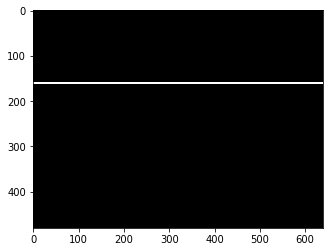

In [22]:
imshow(canvas)

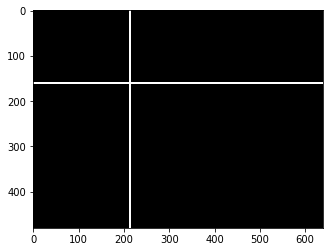

In [20]:
# zeichne Linie von oben nach unten
canvas = cv2.line(canvas, (width//3, 0), (width//3, height), color, thickness=3)
imshow(canvas)

# Einen Detector verwenden

Jetzt nutzen wir einen "standard" Detektor aus der OpenCV Library um Augen in einem Gesicht zu finden.

Die Datei haarcascade_eye.xml wird mit OpenCV mitgeliefert und enthält den "Detector", um Augen in einem Bild zu finden:

In [165]:
cascade = cv2.CascadeClassifier('/usr/local/lib/python3.6/site-packages/cv2/data/haarcascade_eye.xml') 
face_orig = cv2.imread("./resources/frau.png")

In [166]:
# die Methode detectMultiScale scannt mehrfach das Bild mit einem Sliding Window und variert dabei 
# die Größe um den Faktor "scaleFactor"
# der Parameter "minNeighbors" sagt wieviele Detektions mind. in einer Region vorhanden sein müssen
# damit es als Detektion gilt (je mehr desto "sicherer" falschen Detections)

eyes = cascade.detectMultiScale(face_orig, 1.05, 5)

if len(eyes) > 0:
    print("Augen gefunden: {0}".format(eyes))
    for x, y, w, h in eyes:
        # wenn Augen gefunden wurden, zeichnen wir ein Rechteck an diese Stelle
        cv2.rectangle(face_orig, (x, y), (x+w, y+h), (255, 0, 0), 3)

Augen gefunden: [[422 183  45  45]
 [299 218  72  72]]


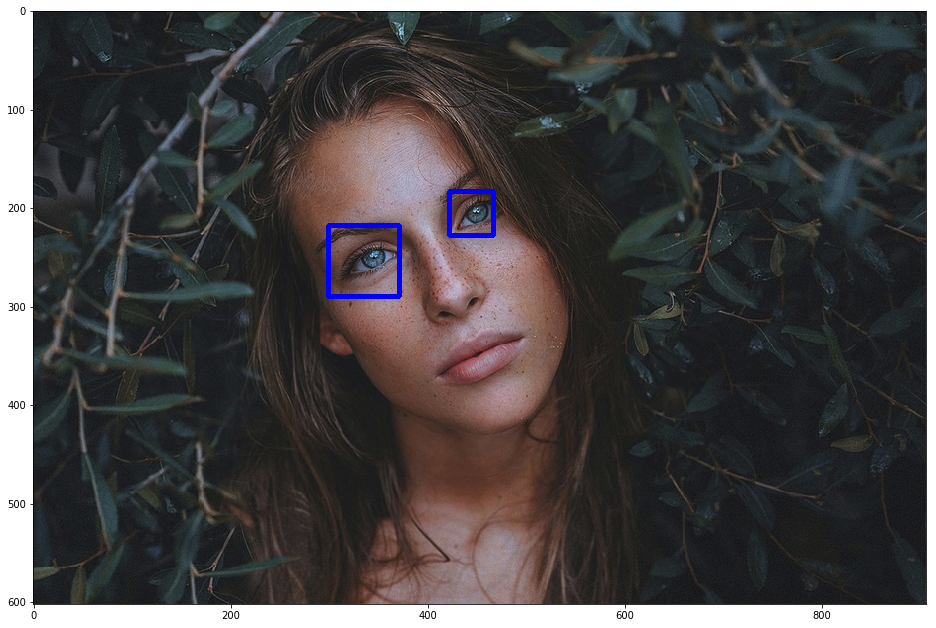

In [167]:
# um das Bild größer anzeigen zu können konfigurieren wir die "figure size" von matplotlib
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12))

# jetzt konvertieren wir das Bild in den richtigen Farbraum und zeigen es an 
face_rgb = cv2.cvtColor(face_orig, cv2.COLOR_BGR2RGB)
imshow(face_rgb)